# Model Training

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [68]:
SEED = 2024

## Load Data

In [69]:
data = pd.read_csv('data/ALL_DATA.csv')
data.head()

,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,landmark_9,...,landmark_33,landmark_34,landmark_35,landmark_36,landmark_37,landmark_38,landmark_39,landmark_40,landmark_41,class
0,0.257211,0.744543,0.339968,0.727104,0.412922,0.627686,0.430567,0.515687,0.429557,0.432274,...,0.557774,0.202958,0.487308,0.206469,0.471129,0.214699,0.552157,0.219286,0.558994,A
1,0.728281,0.759081,0.651978,0.733231,0.597377,0.654941,0.577211,0.569443,0.575342,0.500667,...,0.592039,0.765293,0.558770,0.747134,0.504385,0.739077,0.560152,0.745142,0.584256,A
2,0.239983,0.720653,0.327146,0.702203,0.406762,0.595091,0.427949,0.473646,0.424589,0.384379,...,0.524031,0.180131,0.454967,0.185324,0.425563,0.194856,0.514893,0.198210,0.528913,A
3,0.765670,0.719709,0.681658,0.696189,0.619881,0.611631,0.596331,0.517771,0.590325,0.442671,...,0.535039,0.801037,0.503700,0.785114,0.447262,0.780163,0.506798,0.784924,0.530553,A
4,0.235272,0.711383,0.322961,0.692866,0.402829,0.583089,0.424225,0.457621,0.422013,0.365959,...,0.507626,0.171638,0.440190,0.177146,0.411698,0.187595,0.501418,0.190326,0.514040,A


In [70]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

class_names = label_encoder.classes_

In [71]:
data.shape

(10324, 43)

In [72]:
target = data['class']
data = data.drop('class', axis=1)

## Train Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [74]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [75]:
X_train.shape, X_test.shape

((7226, 42), (3098, 42))

In [76]:
y_train.shape, y_test.shape

((7226,), (3098,))

## Model

In [77]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,660 (68.98 KB)

 Trainable params: 17,212 (67.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [78]:
history = model.fit(
    X_train, 
    y_train_encoded, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1589 - loss: 3.1030 - val_accuracy: 0.1591 - val_loss: 2.9786
Epoch 2/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4998 - loss: 1.6711 - val_accuracy: 0.3264 - val_loss: 2.1176
Epoch 3/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6342 - loss: 1.1818 - val_accuracy: 0.6798 - val_loss: 1.1112
Epoch 4/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7114 - loss: 0.9297 - val_accuracy: 0.8479 - val_loss: 0.5980
Epoch 5/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7472 - loss: 0.7667 - val_accuracy: 0.8361 - val_loss: 0.5873
Epoch 6/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7822 - loss: 0.6809 - val_accuracy: 0.8852 - val_loss: 0.4346
Epoch 7/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7852 - loss: 0.6498 - val_accuracy: 0.7351 - val_loss: 0.7555
Epoch 8/50
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8092 - loss: 0.6026 - val_accuracy: 0.

In [79]:
model.save('asl_classifier_model.keras')

## Model Evaluation

In [80]:
from sklearn.metrics import classification_report

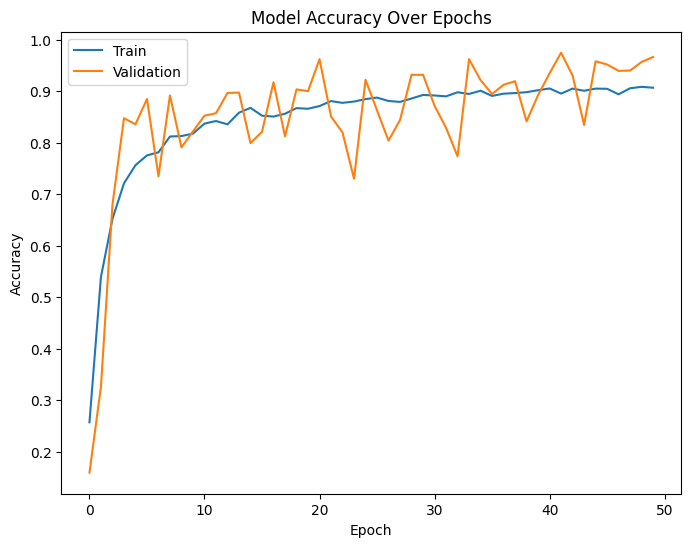

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

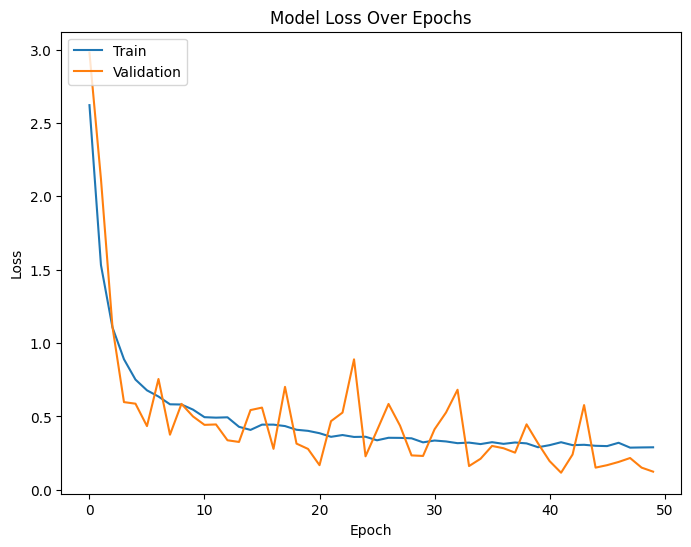

In [82]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [83]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9732 - loss: 0.0940
Test loss: 0.11296692490577698
Test accuracy: 0.9667527675628662


In [84]:
# Get predicted probabilities 
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [85]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94       116
           B       0.96      1.00      0.98       116
           C       1.00      0.97      0.98        98
           D       0.99      0.97      0.98        87
           E       1.00      0.99      1.00       105
           F       1.00      0.97      0.99       106
           G       1.00      0.87      0.93        84
           H       0.99      1.00      1.00       104
           I       1.00      1.00      1.00       104
           J       0.91      1.00      0.95       100
           K       1.00      1.00      1.00       119
           L       1.00      1.00      1.00       111
           M       1.00      0.96      0.98       117
           N       1.00      0.74      0.85       119
           O       0.96      0.99      0.98       137
           P       1.00      0.87      0.93       101
           Q       0.96      0.99      0.98       111
           R       1.00    

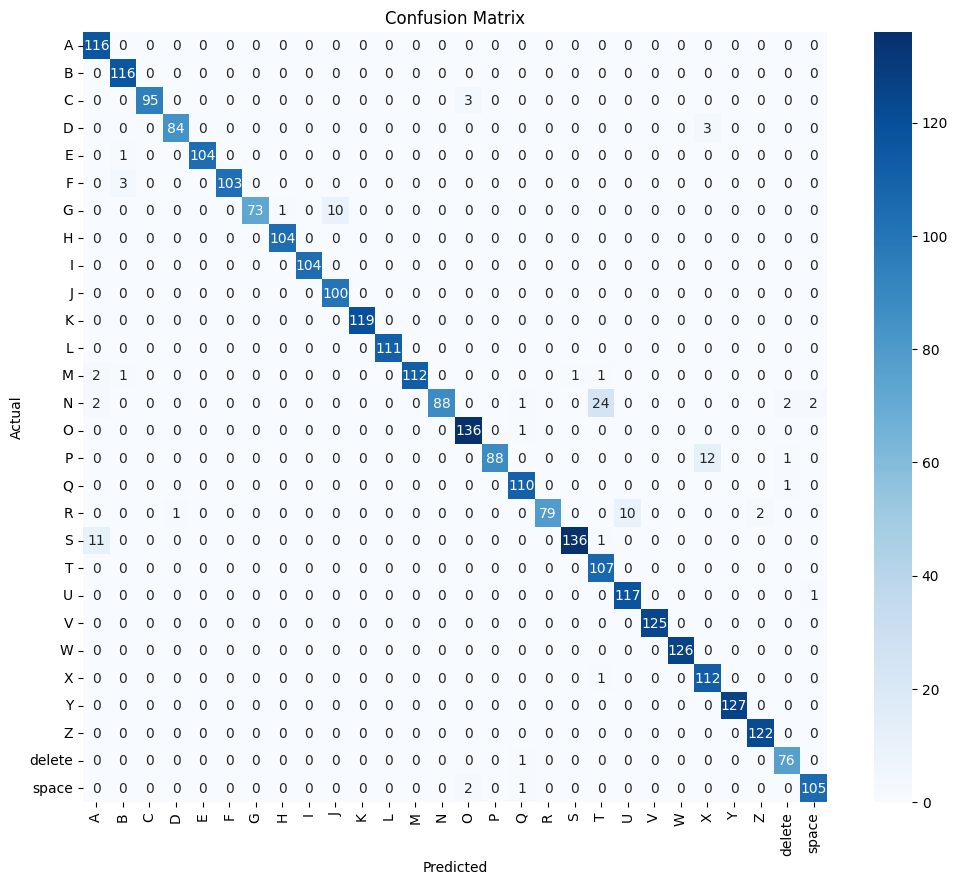

In [86]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()